In [163]:
!pip install sentence-transformers

In [164]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold

'''
Variables:
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension)
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters

''';

In [165]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)


In [166]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    red_mat = TSNE(n_components=p, learning_rate='auto',init='random').fit_transform(mat)

    return red_mat

In [174]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    pred_cluster = KMeans(n_clusters=k, n_init="auto").fit(mat)


    return pred_cluster

In [168]:
#plotting the results:
def plotting(pred_clust,pred_tsne):

    pred_labels= pred_clust.labels_
    #Getting the Centroids
    centroids = pred_clust.cluster_centers_
    u_labels = np.unique(pred_labels)

    for i in u_labels:
        plt.scatter(pred_tsne[pred_labels == i , 0] , pred_tsne[pred_labels == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

NMI: 0.42 
ARI: 0.23


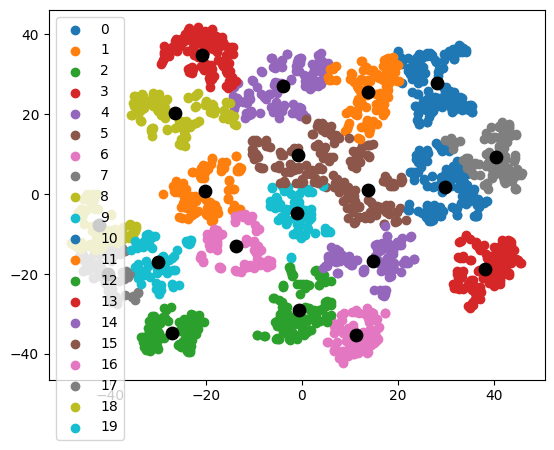

In [170]:

# perform dimentionality reduction
red_emb = dim_red(embeddings, 3)

# perform clustering
pred_clust = clust(red_emb, k)

pred= pred_clust.labels_

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

# perform dimentionality reduction
pred_final = dim_red(red_emb, 2)
pred_clust = clust(pred_final, k)
plotting(pred_clust,pred_final)




In [171]:
# perform clustering
pred_clust = clust(red_emb, k)

In [175]:
def cross_validation(red_emb,N):
  nmi = []
  ari = []
  for i in range(N):

    pred_clust = clust(red_emb, 20)
    pred= pred_clust.labels_
    nmi_score = normalized_mutual_info_score(pred,labels)
    ari_score = adjusted_rand_score(pred,labels)
    nmi.append(nmi_score)
    ari.append(ari_score)
  print(f"NMI scores : {nmi}")
  print(f"ARI scores : {ari}")
  print(f"the mean of NMI is {np.mean(nmi)}")
  print(f"the mean of ARI is {np.mean(ari)}")

In [176]:
cross_validation(red_emb,10)

NMI scores : [0.4097335782590421, 0.4151770213176394, 0.42543646557952797, 0.4172083361908347, 0.40325956056154194, 0.4214046576788983, 0.41462919043061736, 0.4120190267955681, 0.426626705275845, 0.39755456064972633]
ARI scores : [0.2273057871428091, 0.22508219377884803, 0.23472656288048882, 0.23572315366582275, 0.2274516126446091, 0.2448387350948456, 0.22727654892716856, 0.2191311875909759, 0.25144838244712536, 0.20430788163995106]
the mean of NMI is 0.41430491027392413
the mean of ARI is 0.2297292045812644
